In [3]:
import IPython
from scipy.io import wavfile
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt
import librosa
import noisereduce as nr
import tensorflow
import soundfile
%matplotlib inline

/opt/anaconda3/lib/python3.7/site-packages/noisereduce/noisereduce.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [4]:
from Signal_Analysis.features import signal as sig
import logmmse as lgm

In [324]:
def NReAL_engine(data,rate):
    #rate, data = wavfile.read(filepath)
    #fig, ax = plt.subplots(figsize=(20,4))
    #ax.plot(data)
    #print(data)
    #IPython.display.Audio(data=data, rate=rate)
    out = lgm.logmmse(data = data,sampling_rate = rate,output_file="out.wav",initial_noise=6,window_size=0,noise_threshold=0.15)
    #print(out)
    #fig, ax = plt.subplots(figsize=(20,4))
    #ax.plot(out)
    #IPython.display.Audio(data=out, rate=rate)
    #applying noise reduction
    out = out/32768
    noisy_part = out[0:400000]
    # perform noise reduction
    reduced_noise = nr.reduce_noise(audio_clip=out,noise_clip= noisy_part,verbose=False,prop_decrease = 1.0)
    #IPython.display.Audio(data=reduced_noise, rate=rate)
    #re-enhancement / final output
    out = lgm.logmmse(data = reduced_noise,sampling_rate = rate,initial_noise=6,window_size=0,noise_threshold=0.15)
    #print(out)
    #IPython.display.Audio(data=out, rate=rate)
    #Plot of the output file
    #fig, ax = plt.subplots(figsize=(20,4))
    #ax.plot(out*32768)
    return out

[  11  -14   19 ... -671 -623 -697]


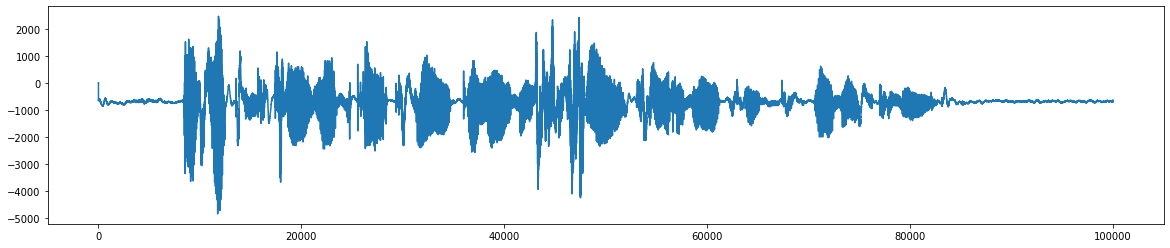

In [996]:
filepath = "Data/Female/a0238.wav"
rate, data = wavfile.read(filepath)
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(data)
print(data)
IPython.display.Audio(data=data, rate=rate)

[-26  -5 -26 ... 316 364 332]


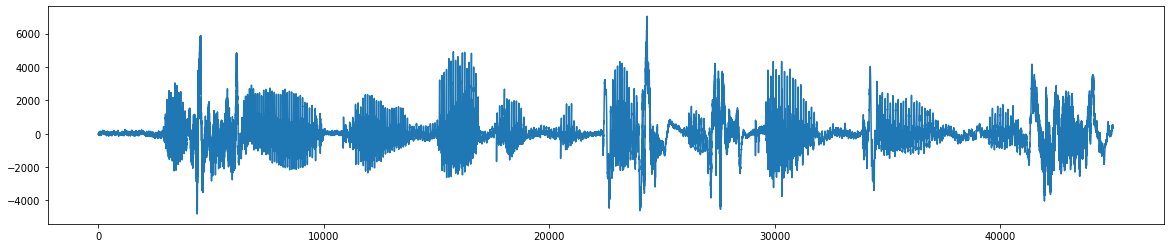

In [992]:
data = data[5000:50000]
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(data)
print(data)
IPython.display.Audio(data=data, rate=rate)

In [1071]:
out = NReAL_engine(data,rate)

array([ 8.7862518e-06,  8.5036463e-06,  3.2283847e-06, ...,
        7.2821951e-04,  6.9983205e-04, -9.7786856e-04], dtype=float32)

[-1.8391340e-05 -1.8181781e-05 -1.8020271e-05 ... -3.1216081e-05
 -2.9415669e-05 -3.0597243e-05]


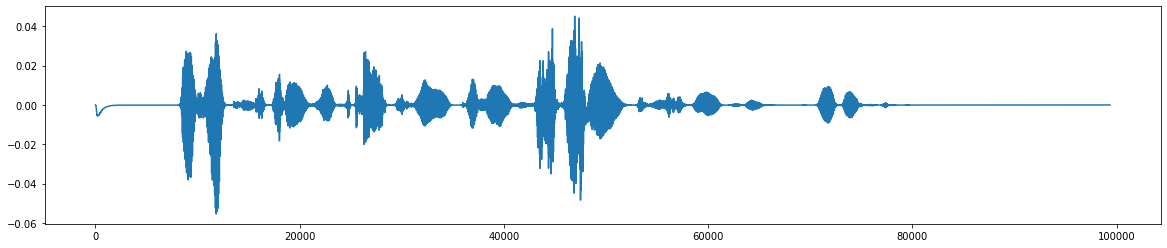

In [998]:
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(out)
print(out)
IPython.display.Audio(data=out, rate=rate)

In [941]:
mf,sf,hnr,gn = measurePitch(filepath, 75, 500, "Hertz")
print(filepath ,"\t",mf,"\t",gn)

Data/Female/b0313.wav 	 201.29597687576424 	 Bandi


In [999]:
sig.get_F_0(out,rate)

<class 'numpy.float64'> 



[163.91752577319585]

In [13]:
count = 0 
for wave_file in glob.glob("Data/Male/*.wav"):
    rate, data = wavfile.read(wave_file)
    count +=1
    print(wave_file ,"\t",sig.get_F_0(data,rate))

<class 'numpy.float64'> 

Data/Male/b0123.wav 	 [107.43243243243242]
<class 'numpy.float64'> 

Data/Male/b0137.wav 	 [102.5806451612903]
<class 'numpy.float64'> 

Data/Male/a0023.wav 	 [105.29801324503309]
<class 'numpy.float64'> 

Data/Male/a0037.wav 	 [115.21739130434781]
<class 'numpy.float64'> 

Data/Male/b0447.wav 	 [131.40495867768593]
<class 'numpy.float64'> 

Data/Male/a0584.wav 	 [95.20958083832333]
<class 'numpy.float64'> 

Data/Male/b0321.wav 	 [87.8453038674033]
<class 'numpy.float64'> 

Data/Male/b0335.wav 	 [89.3258426966292]
<class 'numpy.float64'> 

Data/Male/b0453.wav 	 [138.26086956521738]
<class 'numpy.float64'> 

Data/Male/a0590.wav 	 [193.90243902439022]
<class 'numpy.float64'> 

Data/Male/b0309.wav 	 [108.16326530612243]
<class 'numpy.float64'> 

Data/Male/b0484.wav 	 [147.2222222222222]
<class 'numpy.float64'> 

Data/Male/a0547.wav 	 [125.19685039370076]
<class 'numpy.float64'> 

Data/Male/a0221.wav 	 [122.30769230769228]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 81920 bytes, expected 254210 bytes from header.
  


<class 'numpy.float64'> 

Data/Male/a0235.wav 	 [111.59131205673756]
<class 'numpy.float64'> 

Data/Male/b0490.wav 	 [118.65671641791045]
<class 'numpy.float64'> 

Data/Male/a0553.wav 	 [89.3258426966292]
<class 'numpy.float64'> 

Data/Male/a0209.wav 	 [141.9642857142857]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 65536 bytes, expected 212044 bytes from header.
  


<class 'numpy.float64'> 

Data/Male/b0533.wav 	 [133.61344537815123]
<class 'numpy.float64'> 

Data/Male/b0255.wav 	 [118.65671641791045]
<class 'numpy.float64'> 

Data/Male/a0396.wav 	 [125.19685039370076]
<class 'numpy.float64'> 

Data/Male/b0241.wav 	 [474.7326203208555]
<class 'numpy.float64'> 

Data/Male/a0382.wav 	 [143.24324324324323]
<class 'numpy.float64'> 

Data/Male/b0527.wav 	 [118.65671641791045]
<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 98304 bytes, expected 264044 bytes from header.
  


Data/Male/rp-16.wav 	 [111.97183098591547]
<class 'numpy.float64'> 

Data/Male/b0269.wav 	 [122.30769230769228]
<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 90112 bytes, expected 160044 bytes from header.
  


Data/Male/rp-02.wav 	 [90.34090909090908]
<class 'numpy.float64'> 

Data/Male/a0433.wav 	 [128.22580645161287]
<class 'numpy.float64'> 

Data/Male/b0296.wav 	 [133.61344537815123]
<class 'numpy.float64'> 

Data/Male/a0355.wav 	 [124.21874999999999]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 112254 bytes, expected 156044 bytes from header.
  


<class 'numpy.float64'> 

Data/Male/b0282.wav 	 [141.33612515802778]
<class 'numpy.float64'> 

Data/Male/a0341.wav 	 [113.57142857142856]
<class 'numpy.float64'> 

Data/Male/a0427.wav 	 [92.98245614035086]
<class 'numpy.float64'> 

Data/Male/a0369.wav 	 [129.2682926829268]
<class 'numpy.float64'> 

Data/Male/a0194.wav 	 [124.21874999999999]
<class 'numpy.float64'> 

Data/Male/b0057.wav 	 [110.41666666666664]
<class 'numpy.float64'> 

Data/Male/a0180.wav 	 [127.19999999999997]
<class 'numpy.float64'> 

Data/Male/b0043.wav 	 [111.18881118881117]
<class 'numpy.float64'> 

Data/Male/a0157.wav 	 [121.3740458015267]
<class 'numpy.float64'> 

Data/Male/a0143.wav 	 [121.3740458015267]
<class 'numpy.float64'> 

Data/Male/b0080.wav 	 [132.49999999999997]
<class 'numpy.float64'> 

Data/Male/b0081.wav 	 [131.40495867768593]
<class 'numpy.float64'> 

Data/Male/a0142.wav 	 [120.45454545454542]
<class 'numpy.float64'> 

Data/Male/b0095.wav 	 [110.03591954022986]
<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 81920 bytes, expected 180044 bytes from header.
  


Data/Male/a0156.wav 	 [120.45454545454542]
<class 'numpy.float64'> 

Data/Male/b0042.wav 	 [121.3740458015267]
<class 'numpy.float64'> 

Data/Male/a0181.wav 	 [125.19685039370076]
<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 147456 bytes, expected 200044 bytes from header.
  


Data/Male/b0056.wav 	 [117.77777777777776]
<class 'numpy.float64'> 

Data/Male/a0195.wav 	 [126.19047619047618]
<class 'numpy.float64'> 

Data/Male/a0368.wav 	 [128.22580645161287]
<class 'numpy.float64'> 

Data/Male/a0340.wav 	 [242.7622377622377]
<class 'numpy.float64'> 

Data/Male/b0283.wav 	 [112.36889421636198]
<class 'numpy.float64'> 

Data/Male/a0426.wav 	 [118.65671641791045]
<class 'numpy.float64'> 

Data/Male/a0432.wav 	 [95.78313253012047]
<class 'numpy.float64'> 

Data/Male/a0354.wav 	 [116.05839416058392]
<class 'numpy.float64'> 

Data/Male/b0297.wav 	 [133.61344537815123]
<class 'numpy.float64'> 

Data/Male/rp-03.wav 	 [96.36363636363636]
<class 'numpy.float64'> 

Data/Male/rp-17.wav 	 [111.97183098591547]
<class 'numpy.float64'> 

Data/Male/b0268.wav 	 [125.69366329208847]
<class 'numpy.float64'> 

Data/Male/a0383.wav 	 [154.36893203883494]
<class 'numpy.float64'> 

Data/Male/b0240.wav 	 [112.7659574468085]
<class 'numpy.float64'> 

Data/Male/b0526.wav 	 [108.53368744758

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 106496 bytes, expected 124044 bytes from header.
  


Data/Male/b0532.wav 	 [134.1796040450078]
<class 'numpy.float64'> 

Data/Male/a0397.wav 	 [113.57142857142856]
<class 'numpy.float64'> 

Data/Male/b0254.wav 	 [115.22344168460849]
<class 'numpy.float64'> 

Data/Male/a0208.wav 	 [130.327868852459]
<class 'numpy.float64'> 

Data/Male/a0234.wav 	 [96.95121951219511]
<class 'numpy.float64'> 

Data/Male/a0552.wav 	 [85.48387096774192]
<class 'numpy.float64'> 

Data/Male/b0491.wav 	 [114.38848920863306]
<class 'numpy.float64'> 

Data/Male/a0546.wav 	 [178.6516853932584]
<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 135568 bytes, expected 236044 bytes from header.
  


Data/Male/b0485.wav 	 [154.36893203883494]
<class 'numpy.float64'> 

Data/Male/a0220.wav 	 [110.41666666666664]
<class 'numpy.float64'> 

Data/Male/b0308.wav 	 [105.99999999999999]
<class 'numpy.float64'> 

Data/Male/b0334.wav 	 [89.3258426966292]
<class 'numpy.float64'> 

Data/Male/a0591.wav 	 [174.7463768115942]
<class 'numpy.float64'> 

Data/Male/b0452.wav 	 [139.4736842105263]
<class 'numpy.float64'> 

Data/Male/a0585.wav 	 [93.53264818851862]
<class 'numpy.float64'> 

Data/Male/b0446.wav 	 [128.22580645161287]
<class 'numpy.float64'> 

Data/Male/b0320.wav 	 [91.90751445086703]
<class 'numpy.float64'> 

Data/Male/a0036.wav 	 [127.19999999999997]
<class 'numpy.float64'> 

Data/Male/a0022.wav 	 [114.38848920863306]
<class 'numpy.float64'> 

Data/Male/b0136.wav 	 [95.78313253012047]
<class 'numpy.float64'> 

Data/Male/en-0194.wav 	 [122.30769230769228]
<class 'numpy.float64'> 

Data/Male/b0122.wav 	 [116.91176470588235]
<class 'numpy.float64'> 

Data/Male/b0134.wav 	 [101.598481136697

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 212354 bytes, expected 252044 bytes from header.
  


Data/Male/b0487.wav 	 [124.21874999999999]
<class 'numpy.float64'> 

Data/Male/a0544.wav 	 [154.36893203883494]
<class 'numpy.float64'> 

Data/Male/a0578.wav 	 [107.43243243243242]
<class 'numpy.float64'> 

Data/Male/b0524.wav 	 [115.21739130434781]
<class 'numpy.float64'> 

Data/Male/b0242.wav 	 [174.72527472527472]
<class 'numpy.float64'> 

Data/Male/a0381.wav 	 [154.36893203883494]
<class 'numpy.float64'> 

Data/Male/b0256.wav 	 [122.30769230769228]
<class 'numpy.float64'> 

Data/Male/a0395.wav 	 [124.21874999999999]
<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 57344 bytes, expected 180044 bytes from header.
  


Data/Male/b0530.wav 	 [138.26086956521738]
<class 'numpy.float64'> 

Data/Male/rp-29.wav 	 [103.24675324675323]
<class 'numpy.float64'> 

Data/Male/b0518.wav 	 [123.75227135069652]
<class 'numpy.float64'> 

Data/Male/rp-01.wav 	 [93.52941176470587]
<class 'numpy.float64'> 

Data/Male/rp-15.wav 	 [105.29801324503309]
<class 'numpy.float64'> 

Data/Male/a0424.wav 	 [125.19685039370076]
<class 'numpy.float64'> 

Data/Male/b0281.wav 	 [122.78175313059032]
<class 'numpy.float64'> 

Data/Male/a0342.wav 	 [123.25581395348836]
<class 'numpy.float64'> 

Data/Male/b0295.wav 	 [122.30769230769228]
<class 'numpy.float64'> 

Data/Male/a0356.wav 	 [116.05839416058392]
<class 'numpy.float64'> 

Data/Male/a0430.wav 	 [92.98245614035086]
<class 'numpy.float64'> 

Data/Male/a0418.wav 	 [127.19999999999997]
<class 'numpy.float64'> 

Data/Male/a0183.wav 	 [120.45454545454542]
<class 'numpy.float64'> 

Data/Male/b0040.wav 	 [111.97183098591547]
<class 'numpy.float64'> 

Data/Male/a0197.wav 	 [124.218749999

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 90112 bytes, expected 128044 bytes from header.
  


Data/Male/a0182.wav 	 [127.71290322580643]
<class 'numpy.float64'> 

Data/Male/a0419.wav 	 [127.19999999999997]
<class 'numpy.float64'> 

Data/Male/a0357.wav 	 [122.30769230769228]
<class 'numpy.float64'> 

Data/Male/b0294.wav 	 [124.21874999999999]
<class 'numpy.float64'> 

Data/Male/a0431.wav 	 [89.3258426966292]
<class 'numpy.float64'> 

Data/Male/a0425.wav 	 [145.87155963302752]
<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 65536 bytes, expected 108044 bytes from header.
  


Data/Male/a0343.wav 	 [106.71140939597313]
<class 'numpy.float64'> 

Data/Male/b0280.wav 	 [108.90410958904108]
<class 'numpy.float64'> 

Data/Male/rp-14.wav 	 [103.92156862745097]
<class 'numpy.float64'> 

Data/Male/b0519.wav 	 [120.45454545454542]
<class 'numpy.float64'> 

Data/Male/a0394.wav 	 [106.71140939597313]
<class 'numpy.float64'> 

Data/Male/rp-28.wav 	 [107.43243243243242]
<class 'numpy.float64'> 

Data/Male/b0531.wav 	 [127.19999999999997]
<class 'numpy.float64'> 

Data/Male/b0525.wav 	 [116.91176470588235]
<class 'numpy.float64'> 

Data/Male/a0380.wav 	 [160.60606060606057]
<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 65536 bytes, expected 262188 bytes from header.
  


Data/Male/b0243.wav 	 [128.22580645161287]
<class 'numpy.float64'> 

Data/Male/a0579.wav 	 [116.05839416058392]
<class 'numpy.float64'> 

Data/Male/a0223.wav 	 [120.45454545454542]
<class 'numpy.float64'> 

Data/Male/a0545.wav 	 [117.77777777777776]
<class 'numpy.float64'> 

Data/Male/b0486.wav 	 [108.90410958904108]
<class 'numpy.float64'> 

Data/Male/a0551.wav 	 [129.2682926829268]
<class 'numpy.float64'> 

Data/Male/b0492.wav 	 [113.57142857142856]
<class 'numpy.float64'> 

Data/Male/a0237.wav 	 [122.78175313059032]
<class 'numpy.float64'> 

Data/Male/b0479.wav 	 [126.19047619047618]
<class 'numpy.float64'> 

Data/Male/b0323.wav 	 [149.99999999999997]
<class 'numpy.float64'> 

Data/Male/a0586.wav 	 [108.90410958904108]
<class 'numpy.float64'> 

Data/Male/b0445.wav 	 [118.65671641791045]
<class 'numpy.float64'> 

Data/Male/a0592.wav 	 [174.72527472527472]
<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 40960 bytes, expected 172044 bytes from header.
  


Data/Male/b0451.wav 	 [122.30769230769228]
<class 'numpy.float64'> 

Data/Male/b0337.wav 	 [89.3258426966292]
<class 'numpy.float64'> 

Data/Male/a0009.wav 	 [118.65671641791045]
<class 'numpy.float64'> 

Data/Male/a0021.wav 	 [126.19047619047618]
<class 'numpy.float64'> 

Data/Male/a0035.wav 	 [305.7692307692307]
<class 'numpy.float64'> 

Data/Male/b0109.wav 	 [115.21739130434781]
<class 'numpy.float64'> 

Data/Male/b0135.wav 	 [99.37499999999999]
<class 'numpy.float64'> 

Data/Male/b0119.wav 	 [105.99999999999999]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 125634 bytes, expected 169346 bytes from header.
  


<class 'numpy.float64'> 

Data/Male/b0131.wav 	 [115.21739130434781]
<class 'numpy.float64'> 

Data/Male/b0125.wav 	 [109.65517241379308]
<class 'numpy.float64'> 

Data/Male/en-0193.wav 	 [114.38848920863306]
<class 'numpy.float64'> 

Data/Male/a0019.wav 	 [119.54887218045111]
<class 'numpy.float64'> 

Data/Male/a0031.wav 	 [144.54545454545453]
<class 'numpy.float64'> 

Data/Male/a0025.wav 	 [123.25581395348836]
<class 'numpy.float64'> 

Data/Male/b0469.wav 	 [127.19999999999997]
<class 'numpy.float64'> 

Data/Male/b0333.wav 	 [89.83050847457626]
<class 'numpy.float64'> 

Data/Male/b0455.wav 	 [105.29801324503309]
<class 'numpy.float64'> 

Data/Male/a0582.wav 	 [89.83050847457626]
<class 'numpy.float64'> 

Data/Male/b0441.wav 	 [117.77777777777776]
<class 'numpy.float64'> 

Data/Male/b0327.wav 	 [166.49671052631575]
<class 'numpy.float64'> 

Data/Male/a0569.wav 	 [131.95247933884295]
<class 'numpy.float64'> 

Data/Male/a0233.wav 	 [93.52941176470587]
<class 'numpy.float64'> 

Data/Male

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 188416 bytes, expected 200044 bytes from header.
  


Data/Male/b0247.wav 	 [122.30769230769228]
<class 'numpy.float64'> 

Data/Male/b0521.wav 	 [114.38848920863306]
<class 'numpy.float64'> 

Data/Male/b0535.wav 	 [126.19047619047618]
<class 'numpy.float64'> 

Data/Male/a0390.wav 	 [103.24675324675323]
<class 'numpy.float64'> 

Data/Male/b0253.wav 	 [90.85714285714285]
<class 'numpy.float64'> 

Data/Male/a0409.wav 	 [137.66491754122939]
<class 'numpy.float64'> 

Data/Male/a0347.wav 	 [123.25581395348836]
<class 'numpy.float64'> 

Data/Male/a0421.wav 	 [125.19685039370076]
<class 'numpy.float64'> 

Data/Male/a0435.wav 	 [127.19999999999997]
<class 'numpy.float64'> 

Data/Male/a0353.wav 	 [113.97995889003082]
<class 'numpy.float64'> 

Data/Male/b0290.wav 	 [107.43243243243242]
<class 'numpy.float64'> 

Data/Male/b0079.wav 	 [132.49999999999997]
<class 'numpy.float64'> 

Data/Male/b0045.wav 	 [116.91176470588235]
<class 'numpy.float64'> 

Data/Male/a0186.wav 	 [115.21739130434781]
<class 'numpy.float64'> 

Data/Male/b0051.wav 	 [103.24675324

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 98304 bytes, expected 148044 bytes from header.
  


Data/Male/a0179.wav 	 [114.38848920863306]
<class 'numpy.float64'> 

Data/Male/b0086.wav 	 [130.86641376507248]
<class 'numpy.float64'> 

Data/Male/a0145.wav 	 [120.45454545454542]
<class 'numpy.float64'> 

Data/Male/b0092.wav 	 [97.54601226993864]
<class 'numpy.float64'> 

Data/Male/a0151.wav 	 [111.18881118881117]
<class 'numpy.float64'> 

Data/Male/a0150.wav 	 [112.7659574468085]
<class 'numpy.float64'> 

Data/Male/b0093.wav 	 [100.31645569620252]
<class 'numpy.float64'> 

Data/Male/a0144.wav 	 [121.3740458015267]
<class 'numpy.float64'> 

Data/Male/b0087.wav 	 [115.21739130434781]
<class 'numpy.float64'> 

Data/Male/a0178.wav 	 [131.40495867768593]
<class 'numpy.float64'> 

Data/Male/a0193.wav 	 [122.30769230769228]
<class 'numpy.float64'> 

Data/Male/b0050.wav 	 [107.79784886927743]
<class 'numpy.float64'> 

Data/Male/a0187.wav 	 [118.65671641791045]
<class 'numpy.float64'> 

Data/Male/b0044.wav 	 [112.7659574468085]
<class 'numpy.float64'> 

Data/Male/b0078.wav 	 [128.22580645161

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 98304 bytes, expected 224044 bytes from header.
  


Data/Male/b0483.wav 	 [132.49999999999997]
<class 'numpy.float64'> 

Data/Male/a0540.wav 	 [137.66491754122939]
<class 'numpy.float64'> 

Data/Male/a0226.wav 	 [118.21724709784411]
<class 'numpy.float64'> 

Data/Male/a0232.wav 	 [105.29801324503309]
<class 'numpy.float64'> 

Data/Male/b0497.wav 	 [115.21739130434781]
<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 168442 bytes, expected 296044 bytes from header.
  


Data/Male/a0554.wav 	 [90.34090909090908]
<class 'numpy.float64'> 

Data/Male/a0568.wav 	 [170.05833905284828]
<class 'numpy.float64'> 

Data/Male/b0440.wav 	 [111.58032108736333]
<class 'numpy.float64'> 

Data/Male/b0326.wav 	 [184.88372093023253]
<class 'numpy.float64'> 

Data/Male/b0332.wav 	 [128.22580645161287]
<class 'numpy.float64'> 

Data/Male/b0454.wav 	 [93.26235035090133]
<class 'numpy.float64'> 

Data/Male/b0468.wav 	 [121.3740458015267]
<class 'numpy.float64'> 

Data/Male/a0024.wav 	 [108.90410958904108]
<class 'numpy.float64'> 

Data/Male/a0030.wav 	 [101.9230769230769]
<class 'numpy.float64'> 

Data/Male/a0018.wav 	 [109.65517241379308]
<class 'numpy.float64'> 

Data/Male/en-0192.wav 	 [119.54887218045111]
<class 'numpy.float64'> 

Data/Male/b0124.wav 	 [111.18881118881117]
<class 'numpy.float64'> 

Data/Male/b0130.wav 	 [113.57142857142856]
<class 'numpy.float64'> 

Data/Male/en-0186.wav 	 [116.91176470588235]
<class 'numpy.float64'> 

Data/Male/b0118.wav 	 [125.1968503

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 163840 bytes, expected 260044 bytes from header.
  


Data/Male/a0032.wav 	 [111.18881118881117]
<class 'numpy.float64'> 

Data/Male/b0318.wav 	 [134.7457627118644]
<class 'numpy.float64'> 

Data/Male/b0324.wav 	 [178.6516853932584]
<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 155648 bytes, expected 228044 bytes from header.
  


Data/Male/a0581.wav 	 [86.64914468995009]
<class 'numpy.float64'> 

Data/Male/b0442.wav 	 [138.26086956521738]
<class 'numpy.float64'> 

Data/Male/b0456.wav 	 [109.65517241379308]
<class 'numpy.float64'> 

Data/Male/b0330.wav 	 [132.49999999999997]
<class 'numpy.float64'> 

Data/Male/a0218.wav 	 [115.21739130434781]
<class 'numpy.float64'> 

Data/Male/a0224.wav 	 [114.38848920863306]
<class 'numpy.float64'> 

Data/Male/a0542.wav 	 [154.36893203883494]
<class 'numpy.float64'> 

Data/Male/b0481.wav 	 [145.87155963302752]
<class 'numpy.float64'> 

Data/Male/a0556.wav 	 [90.85714285714285]
<class 'numpy.float64'> 

Data/Male/b0495.wav 	 [116.05839416058392]
<class 'numpy.float64'> 

Data/Male/a0230.wav 	 [116.48507943323312]
<class 'numpy.float64'> 

Data/Male/rp-13.wav 	 [103.92156862745097]
<class 'numpy.float64'> 

Data/Male/rp-07.wav 	 [86.88524590163932]
<class 'numpy.float64'> 

Data/Male/a0393.wav 	 [108.16326530612243]
<class 'numpy.float64'> 

Data/Male/b0250.wav 	 [114.8029402564

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 57344 bytes, expected 116044 bytes from header.
  


Data/Male/b0052.wav 	 [88.82681564245809]
<class 'numpy.float64'> 

Data/Male/a0191.wav 	 [140.70796460176987]
<class 'numpy.float64'> 

Data/Male/b0046.wav 	 [114.38848920863306]
<class 'numpy.float64'> 

Data/Male/a0185.wav 	 [114.38848920863306]
<class 'numpy.float64'> 

Data/Male/b0091.wav 	 [117.77777777777776]
<class 'numpy.float64'> 

Data/Male/a0152.wav 	 [108.16326530612243]
<class 'numpy.float64'> 

Data/Male/b0085.wav 	 [128.22580645161287]
<class 'numpy.float64'> 

Data/Male/a0146.wav 	 [119.54887218045111]
<class 'numpy.float64'> 

Data/Male/a0147.wav 	 [117.77777777777776]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 188416 bytes, expected 210306 bytes from header.
  


<class 'numpy.float64'> 

Data/Male/b0084.wav 	 [124.70780019685037]
<class 'numpy.float64'> 

Data/Male/a0153.wav 	 [111.18881118881117]
<class 'numpy.float64'> 

Data/Male/b0090.wav 	 [103.24675324675323]
<class 'numpy.float64'> 

Data/Male/a0184.wav 	 [139.4736842105263]
<class 'numpy.float64'> 

Data/Male/b0047.wav 	 [133.61344537815123]
<class 'numpy.float64'> 

Data/Male/a0190.wav 	 [133.0567226890756]
<class 'numpy.float64'> 

Data/Male/b0053.wav 	 [105.64900662251654]
<class 'numpy.float64'> 

Data/Male/a0423.wav 	 [130.327868852459]
<class 'numpy.float64'> 

Data/Male/b0286.wav 	 [112.7659574468085]
<class 'numpy.float64'> 

Data/Male/a0345.wav 	 [122.30769230769228]
<class 'numpy.float64'> 

Data/Male/b0292.wav 	 [95.78313253012047]
<class 'numpy.float64'> 

Data/Male/a0351.wav 	 [126.69523809523807]
<class 'numpy.float64'> 

Data/Male/a0437.wav 	 [163.91752577319585]
<class 'numpy.float64'> 

Data/Male/a0379.wav 	 [182.78276955602536]
<class 'numpy.float64'> 

Data/Male/b052

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 116148 bytes, expected 124044 bytes from header.
  


Data/Male/a0557.wav 	 [93.52941176470587]
<class 'numpy.float64'> 

Data/Male/a0231.wav 	 [114.38848920863306]
<class 'numpy.float64'> 

Data/Male/a0225.wav 	 [130.86641376507248]
<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 57344 bytes, expected 163884 bytes from header.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 212992 bytes, expected 388044 bytes from header.
  


Data/Male/b0480.wav 	 [145.87155963302752]
<class 'numpy.float64'> 

Data/Male/a0543.wav 	 [154.36893203883494]
<class 'numpy.float64'> 

Data/Male/b0457.wav 	 [109.65517241379308]
<class 'numpy.float64'> 

Data/Male/b0331.wav 	 [92.17468745799164]
<class 'numpy.float64'> 

Data/Male/b0325.wav 	 [129.2682926829268]
<class 'numpy.float64'> 

Data/Male/b0443.wav 	 [144.54545454545453]
<class 'numpy.float64'> 

Data/Male/a0580.wav 	 [101.9230769230769]
<class 'numpy.float64'> 

Data/Male/b0319.wav 	 [90.59902597402596]
<class 'numpy.float64'> 

Data/Male/a0033.wav 	 [112.7659574468085]
<class 'numpy.float64'> 

Data/Male/a0027.wav 	 [119.54887218045111]
<class 'numpy.float64'> 

Data/Male/b0133.wav 	 [108.16827101073676]
<class 'numpy.float64'> 

Data/Male/en-0185.wav 	 [111.18881118881117]
<class 'numpy.float64'> 

Data/Male/en-0191.wav 	 [119.10279429918077]
<class 'numpy.float64'> 

Data/Male/b0127.wav 	 [110.41666666666664]
<class 'numpy.float64'> 

Data/Male/b0140.wav 	 [139.47368421

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 32768 bytes, expected 144044 bytes from header.
  


Data/Male/a0281.wav 	 [98.75776397515526]
<class 'numpy.float64'> 

Data/Male/b0342.wav 	 [92.98245614035086]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 65536 bytes, expected 140674 bytes from header.
  


<class 'numpy.float64'> 

Data/Male/b0424.wav 	 [115.21739130434781]
<class 'numpy.float64'> 

Data/Male/b0430.wav 	 [134.7457627118644]
<class 'numpy.float64'> 

Data/Male/a0295.wav 	 [141.9642857142857]
<class 'numpy.float64'> 

Data/Male/b0356.wav 	 [110.41666666666664]
<class 'numpy.float64'> 

Data/Male/b0418.wav 	 [101.9230769230769]
<class 'numpy.float64'> 

Data/Male/a0242.wav 	 [120.91429562803606]
<class 'numpy.float64'> 

Data/Male/b0381.wav 	 [174.72527472527472]
<class 'numpy.float64'> 

Data/Male/a0524.wav 	 [128.22580645161287]
<class 'numpy.float64'> 

Data/Male/a0530.wav 	 [115.21739130434781]
<class 'numpy.float64'> 

Data/Male/a0256.wav 	 [96.0733844468784]
<class 'numpy.float64'> 

Data/Male/b0395.wav 	 [140.0908244061481]
<class 'numpy.float64'> 

Data/Male/a0518.wav 	 [121.3740458015267]
<class 'numpy.float64'> 

Data/Male/b0236.wav 	 [111.18881118881117]
<class 'numpy.float64'> 

Data/Male/a0493.wav 	 [139.4736842105263]
<class 'numpy.float64'> 

Data/Male/rb-15.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 40960 bytes, expected 192044 bytes from header.
  


Data/Male/a0487.wav 	 [108.16326530612243]
<class 'numpy.float64'> 

Data/Male/rb-01.wav 	 [114.38848920863306]
<class 'numpy.float64'> 

Data/Male/b0222.wav 	 [96.36363636363636]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 252396 bytes, expected 344044 bytes from header.
  


<class 'numpy.float64'> 

Data/Male/rb-29.wav 	 [140.70796460176987]
<class 'numpy.float64'> 

Data/Male/a0336.wav 	 [147.2222222222222]
<class 'numpy.float64'> 

Data/Male/a0450.wav 	 [92.98245614035086]
<class 'numpy.float64'> 

Data/Male/a0444.wav 	 [178.6516853932584]
<class 'numpy.float64'> 

Data/Male/a0322.wav 	 [103.92156862745097]
<class 'numpy.float64'> 

Data/Male/a0478.wav 	 [160.60606060606057]
<class 'numpy.float64'> 

Data/Male/b0034.wav 	 [123.25581395348836]
<class 'numpy.float64'> 

Data/Male/b0020.wav 	 [109.65517241379308]
<class 'numpy.float64'> 

Data/Male/ar-21.wav 	 [162.24489795918365]
<class 'numpy.float64'> 

Data/Male/ar-09.wav 	 [128.74704956726984]
<class 'numpy.float64'> 

Data/Male/b0008.wav 	 [155.88235294117646]
<class 'numpy.float64'> 

Data/Male/a0134.wav 	 [116.05839416058392]
<class 'numpy.float64'> 

Data/Male/a0120.wav 	 [112.7659574468085]
<class 'numpy.float64'> 

Data/Male/a0108.wav 	 [97.54601226993864]
<class 'numpy.float64'> 

Data/Male/a01

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 131072 bytes, expected 172044 bytes from header.
  


Data/Male/a0323.wav 	 [108.16326530612243]
<class 'numpy.float64'> 

Data/Male/a0337.wav 	 [237.3134328358209]
<class 'numpy.float64'> 

Data/Male/a0451.wav 	 [92.44186046511626]
<class 'numpy.float64'> 

Data/Male/rb-28.wav 	 [121.3740458015267]
<class 'numpy.float64'> 

Data/Male/a0486.wav 	 [93.52941176470587]
<class 'numpy.float64'> 

Data/Male/b0223.wav 	 [148.59813084112147]
<class 'numpy.float64'> 

Data/Male/b0237.wav 	 [107.43243243243242]
<class 'numpy.float64'> 

Data/Male/rb-14.wav 	 [95.78313253012047]
<class 'numpy.float64'> 

Data/Male/a0492.wav 	 [139.4736842105263]
<class 'numpy.float64'> 

Data/Male/a0519.wav 	 [116.05839416058392]
<class 'numpy.float64'> 

Data/Male/a0531.wav 	 [105.99999999999999]
<class 'numpy.float64'> 

Data/Male/b0394.wav 	 [138.26086956521738]
<class 'numpy.float64'> 

Data/Male/a0257.wav 	 [118.65671641791045]
<class 'numpy.float64'> 

Data/Male/b0380.wav 	 [165.62499999999997]
<class 'numpy.float64'> 

Data/Male/a0243.wav 	 [119.1027942991807

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 106496 bytes, expected 168044 bytes from header.
  


Data/Male/a0055.wav 	 [119.54887218045111]
<class 'numpy.float64'> 

Data/Male/b0196.wav 	 [135.89743589743588]
<class 'numpy.float64'> 

Data/Male/a0041.wav 	 [109.65517241379308]
<class 'numpy.float64'> 

Data/Male/b0182.wav 	 [119.54887218045111]
<class 'numpy.float64'> 

Data/Male/b0169.wav 	 [126.19047619047618]
<class 'numpy.float64'> 

Data/Male/a0096.wav 	 [108.53368744758176]
<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 147456 bytes, expected 163884 bytes from header.
  


Data/Male/b0155.wav 	 [173.77568084089822]
<class 'numpy.float64'> 

Data/Male/a0082.wav 	 [124.70780019685037]
<class 'numpy.float64'> 

Data/Male/b0141.wav 	 [163.91752577319585]
<class 'numpy.float64'> 

Data/Male/b0157.wav 	 [201.2658227848101]
<class 'numpy.float64'> 

Data/Male/a0094.wav 	 [137.06896551724137]
<class 'numpy.float64'> 

Data/Male/b0143.wav 	 [143.24324324324323]
<class 'numpy.float64'> 

Data/Male/a0080.wav 	 [101.27388535031845]
<class 'numpy.float64'> 

Data/Male/b0194.wav 	 [126.19047619047618]
<class 'numpy.float64'> 

Data/Male/a0057.wav 	 [109.65517241379308]
<class 'numpy.float64'> 

Data/Male/b0180.wav 	 [109.27964100141708]
<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 32768 bytes, expected 131116 bytes from header.
  


Data/Male/a0043.wav 	 [116.91176470588235]
<class 'numpy.float64'> 

Data/Male/a0296.wav 	 [92.98245614035086]
<class 'numpy.float64'> 

Data/Male/b0355.wav 	 [141.9642857142857]
<class 'numpy.float64'> 

Data/Male/b0433.wav 	 [132.49999999999997]
<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 73728 bytes, expected 292044 bytes from header.
  


Data/Male/b0427.wav 	 [184.88372093023253]
<class 'numpy.float64'> 

Data/Male/a0282.wav 	 [189.28571428571425]
<class 'numpy.float64'> 

Data/Male/b0341.wav 	 [90.34090909090908]
<class 'numpy.float64'> 

Data/Male/b0369.wav 	 [141.9642857142857]
<class 'numpy.float64'> 

Data/Male/a0255.wav 	 [100.63291139240505]
<class 'numpy.float64'> 

Data/Male/b0396.wav 	 [126.19047619047618]
<class 'numpy.float64'> 

Data/Male/a0533.wav 	 [123.73728197674417]
<class 'numpy.float64'> 

Data/Male/a0527.wav 	 [90.85714285714285]
<class 'numpy.float64'> 

Data/Male/a0241.wav 	 [95.50324675324674]
<class 'numpy.float64'> 

Data/Male/b0382.wav 	 [108.90410958904108]
<class 'numpy.float64'> 

Data/Male/a0269.wav 	 [113.57142857142856]
<class 'numpy.float64'> 

Data/Male/b0221.wav 	 [151.42857142857142]
<class 'numpy.float64'> 

Data/Male/a0484.wav 	 [103.5841609371021]
<class 'numpy.float64'> 

Data/Male/rb-02.wav 	 [105.99999999999999]
<class 'numpy.float64'> 

Data/Male/a0490.wav 	 [107.071920914202

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 131072 bytes, expected 142038 bytes from header.
  


Data/Male/a0123.wav 	 [145.87155963302752]
<class 'numpy.float64'> 

Data/Male/a0137.wav 	 [116.91176470588235]
<class 'numpy.float64'> 

Data/Male/a0136.wav 	 [116.91176470588235]
<class 'numpy.float64'> 

Data/Male/a0122.wav 	 [108.90410958904108]
<class 'numpy.float64'> 

Data/Male/b0036.wav 	 [121.3740458015267]
<class 'numpy.float64'> 

Data/Male/ar-23.wav 	 [109.65517241379308]
<class 'numpy.float64'> 

Data/Male/b0022.wav 	 [108.90410958904108]
<class 'numpy.float64'> 

Data/Male/a0334.wav 	 [147.2222222222222]
<class 'numpy.float64'> 

Data/Male/a0320.wav 	 [141.9642857142857]
<class 'numpy.float64'> 

Data/Male/a0446.wav 	 [170.96774193548384]
<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 57344 bytes, expected 88044 bytes from header.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 131072 bytes, expected 184044 bytes from header.
  


Data/Male/b0208.wav 	 [145.2327327327327]
<class 'numpy.float64'> 

Data/Male/rb-17.wav 	 [95.20958083832333]
<class 'numpy.float64'> 

Data/Male/a0491.wav 	 [141.9642857142857]
<class 'numpy.float64'> 

Data/Male/b0234.wav 	 [119.54887218045111]
<class 'numpy.float64'> 

Data/Male/b0220.wav 	 [140.70796460176987]
<class 'numpy.float64'> 

Data/Male/rb-03.wav 	 [104.60526315789471]
<class 'numpy.float64'> 

Data/Male/a0485.wav 	 [101.27388535031845]
<class 'numpy.float64'> 

Data/Male/a0268.wav 	 [116.05839416058392]
<class 'numpy.float64'> 

Data/Male/a0240.wav 	 [89.83050847457626]
<class 'numpy.float64'> 

Data/Male/b0397.wav 	 [130.327868852459]
<class 'numpy.float64'> 

Data/Male/a0254.wav 	 [101.27388535031845]
<class 'numpy.float64'> 

Data/Male/a0532.wav 	 [107.43243243243242]
<class 'numpy.float64'> 

Data/Male/b0368.wav 	 [105.29801324503309]
<class 'numpy.float64'> 

Data/Male/b0426.wav 	 [106.71140939597313]
<class 'numpy.float64'> 

Data/Male/b0340.wav 	 [90.08570878274267

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 57344 bytes, expected 188044 bytes from header.
  


Data/Male/b0393.wav 	 [139.4736842105263]
<class 'numpy.float64'> 

Data/Male/a0250.wav 	 [124.21874999999999]
<class 'numpy.float64'> 

Data/Male/b0387.wav 	 [119.54887218045111]
<class 'numpy.float64'> 

Data/Male/a0244.wav 	 [121.3740458015267]
<class 'numpy.float64'> 

Data/Male/a0522.wav 	 [116.91176470588235]
<class 'numpy.float64'> 

Data/Male/b0218.wav 	 [149.29906542056074]
<class 'numpy.float64'> 

Data/Male/rb-07.wav 	 [111.18881118881117]
<class 'numpy.float64'> 

Data/Male/a0481.wav 	 [89.57817558560274]
<class 'numpy.float64'> 

Data/Male/b0224.wav 	 [181.72021943573665]
<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 40960 bytes, expected 124044 bytes from header.
  


Data/Male/b0230.wav 	 [121.3740458015267]
<class 'numpy.float64'> 

Data/Male/rb-13.wav 	 [93.52941176470587]
<class 'numpy.float64'> 

Data/Male/a0495.wav 	 [149.99999999999997]
<class 'numpy.float64'> 

Data/Male/a0318.wav 	 [129.2682926829268]
<class 'numpy.float64'> 

Data/Male/a0442.wav 	 [119.54887218045111]
<class 'numpy.float64'> 

Data/Male/a0324.wav 	 [101.9230769230769]
<class 'numpy.float64'> 

Data/Male/a0330.wav 	 [143.24324324324323]
<class 'numpy.float64'> 

Data/Male/b0026.wav 	 [108.90410958904108]
<class 'numpy.float64'> 

Data/Male/b0032.wav 	 [119.54887218045111]
<class 'numpy.float64'> 

Data/Male/a0126.wav 	 [141.9642857142857]
<class 'numpy.float64'> 

Data/Male/a0132.wav 	 [125.19685039370076]
<class 'numpy.float64'> 

Data/Male/a0133.wav 	 [113.57142857142856]
<class 'numpy.float64'> 

Data/Male/a0127.wav 	 [135.32159930465014]
<class 'numpy.float64'> 

Data/Male/b0033.wav 	 [125.19685039370076]
<class 'numpy.float64'> 

Data/Male/b0027.wav 	 [118.656716417910

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 106496 bytes, expected 192044 bytes from header.
  


Data/Male/a0319.wav 	 [147.2222222222222]
<class 'numpy.float64'> 

Data/Male/b0231.wav 	 [125.19685039370076]
<class 'numpy.float64'> 

Data/Male/a0494.wav 	 [138.26086956521738]
<class 'numpy.float64'> 

Data/Male/rb-12.wav 	 [95.78313253012047]
<class 'numpy.float64'> 

Data/Male/a0480.wav 	 [174.72527472527472]
<class 'numpy.float64'> 

Data/Male/rb-06.wav 	 [109.65517241379308]
<class 'numpy.float64'> 

Data/Male/b0225.wav 	 [149.99999999999997]
<class 'numpy.float64'> 

Data/Male/b0219.wav 	 [144.54545454545453]
<class 'numpy.float64'> 

Data/Male/a0245.wav 	 [121.3740458015267]
<class 'numpy.float64'> 

Data/Male/b0386.wav 	 [105.29801324503309]
<class 'numpy.float64'> 

Data/Male/a0523.wav 	 [117.77777777777776]
<class 'numpy.float64'> 

Data/Male/a0537.wav 	 [157.42574257425738]
<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 49152 bytes, expected 96044 bytes from header.
  


Data/Male/a0251.wav 	 [116.05839416058392]
<class 'numpy.float64'> 

Data/Male/b0392.wav 	 [131.40495867768593]
<class 'numpy.float64'> 

Data/Male/a0279.wav 	 [121.3740458015267]
<class 'numpy.float64'> 

Data/Male/a0286.wav 	 [133.61344537815123]
<class 'numpy.float64'> 

Data/Male/b0345.wav 	 [92.17468745799164]
<class 'numpy.float64'> 

Data/Male/b0423.wav 	 [123.25581395348836]
<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 65536 bytes, expected 132044 bytes from header.
  


Data/Male/b0437.wav 	 [109.65517241379308]
<class 'numpy.float64'> 

Data/Male/a0292.wav 	 [143.24324324324323]
<class 'numpy.float64'> 

Data/Male/b0351.wav 	 [163.08121186618973]
<class 'numpy.float64'> 

Data/Male/b0379.wav 	 [169.14893617021272]
<class 'numpy.float64'> 

Data/Male/b0184.wav 	 [103.92156862745097]
<class 'numpy.float64'> 

Data/Male/a0047.wav 	 [108.90410958904108]
<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 212992 bytes, expected 456044 bytes from header.
  


Data/Male/b0190.wav 	 [114.38848920863306]
<class 'numpy.float64'> 

Data/Male/a0053.wav 	 [138.26086956521738]
<class 'numpy.float64'> 

Data/Male/b0147.wav 	 [141.9642857142857]
<class 'numpy.float64'> 

Data/Male/a0084.wav 	 [110.41666666666664]
<class 'numpy.float64'> 

Data/Male/b0153.wav 	 [107.07192091420278]
<class 'numpy.float64'> 

Data/Male/a0090.wav 	 [129.2682926829268]
<class 'numpy.float64'> 

Data/Male/b0179.wav 	 [104.60526315789471]
<class 'numpy.float64'> 

Data/Male/a0086.wav 	 [101.9230769230769]
<class 'numpy.float64'> 

Data/Male/b0145.wav 	 [124.21874999999999]
<class 'numpy.float64'> 

Data/Male/a0092.wav 	 [95.20958083832333]
<class 'numpy.float64'> 

Data/Male/b0151.wav 	 [152.88461538461536]
<class 'numpy.float64'> 

Data/Male/a0079.wav 	 [97.54601226993864]
<class 'numpy.float64'> 

Data/Male/a0045.wav 	 [116.05839416058392]
<class 'numpy.float64'> 

Data/Male/b0186.wav 	 [85.94594594594592]
<class 'numpy.float64'> 

Data/Male/a0051.wav 	 [111.1888111888111

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 122880 bytes, expected 132044 bytes from header.
  


<class 'numpy.float64'> 

Data/Male/a0290.wav 	 [132.49999999999997]
<class 'numpy.float64'> 

Data/Male/b0435.wav 	 [129.7980807676929]
<class 'numpy.float64'> 

Data/Male/a0509.wav 	 [167.36842105263153]
<class 'numpy.float64'> 

Data/Male/a0521.wav 	 [120.45454545454542]
<class 'numpy.float64'> 

Data/Male/b0384.wav 	 [113.57142857142856]
<class 'numpy.float64'> 

Data/Male/a0247.wav 	 [129.2682926829268]
<class 'numpy.float64'> 

Data/Male/b0390.wav 	 [127.71290322580643]
<class 'numpy.float64'> 

Data/Male/a0253.wav 	 [99.37499999999999]
<class 'numpy.float64'> 

Data/Male/a0535.wav 	 [149.99999999999997]
<class 'numpy.float64'> 

Data/Male/rb-10.wav 	 [94.64285714285712]
<class 'numpy.float64'> 

Data/Male/a0496.wav 	 [149.99999999999997]
<class 'numpy.float64'> 

Data/Male/b0233.wav 	 [125.19685039370076]
<class 'numpy.float64'> 

Data/Male/b0227.wav 	 [150.7142857142857]
<class 'numpy.float64'> 

Data/Male/rb-04.wav 	 [116.05839416058392]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 172032 bytes, expected 324044 bytes from header.
  


<class 'numpy.float64'> 

Data/Male/a0482.wav 	 [89.83050847457626]
<class 'numpy.float64'> 

Data/Male/a0469.wav 	 [103.92156862745097]
<class 'numpy.float64'> 

Data/Male/a0455.wav 	 [169.14893617021272]
<class 'numpy.float64'> 

Data/Male/a0327.wav 	 [132.49999999999997]
<class 'numpy.float64'> 

Data/Male/a0441.wav 	 [124.21874999999999]
<class 'numpy.float64'> 

Data/Male/ar-18.wav 	 [94.08284023668638]
<class 'numpy.float64'> 

Data/Male/b0019.wav 	 [109.27964100141708]
<class 'numpy.float64'> 

Data/Male/b0031.wav 	 [127.19999999999997]
<class 'numpy.float64'> 

Data/Male/ar-24.wav 	 [103.24675324675323]
<class 'numpy.float64'> 

Data/Male/b0025.wav 	 [108.90410958904108]
<class 'numpy.float64'> 

Data/Male/a0119.wav 	 [110.41666666666664]
<class 'numpy.float64'> 

Data/Male/a0131.wav 	 [141.9642857142857]
<class 'numpy.float64'> 

Data/Male/a0125.wav 	 [149.99999999999997]
<class 'numpy.float64'> 

Data/Male/a0124.wav 	 [149.99999999999997]
<class 'numpy.float64'> 

Data/Male/a

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 98304 bytes, expected 124044 bytes from header.
  


Data/Male/b0178.wav 	 [133.61344537815123]
<class 'numpy.float64'> 

Data/Male/b0161.wav 	 [184.88372093023253]
<class 'numpy.float64'> 

Data/Male/b0175.wav 	 [128.22580645161287]
<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 131072 bytes, expected 160044 bytes from header.
  


Data/Male/b0149.wav 	 [133.61344537815123]
<class 'numpy.float64'> 

Data/Male/a0061.wav 	 [120.45454545454542]
<class 'numpy.float64'> 

Data/Male/a0075.wav 	 [116.91176470588235]
<class 'numpy.float64'> 

Data/Male/a0049.wav 	 [113.57142857142856]
<class 'numpy.float64'> 

Data/Male/b0363.wav 	 [134.7457627118644]
<class 'numpy.float64'> 

Data/Male/b0405.wav 	 [109.65517241379308]
<class 'numpy.float64'> 

Data/Male/b0411.wav 	 [117.77777777777776]
<class 'numpy.float64'> 

Data/Male/b0377.wav 	 [169.14893617021272]
<class 'numpy.float64'> 

Data/Male/b0439.wav 	 [116.05839416058392]
<class 'numpy.float64'> 

Data/Male/a0288.wav 	 [132.49999999999997]
<class 'numpy.float64'> 

Data/Male/a0505.wav 	 [141.9642857142857]
<class 'numpy.float64'> 

Data/Male/a0511.wav 	 [129.7980807676929]
<class 'numpy.float64'> 

Data/Male/a0277.wav 	 [138.26086956521738]
<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 114688 bytes, expected 216044 bytes from header.
  


Data/Male/a0539.wav 	 [109.65517241379308]
<class 'numpy.float64'> 

Data/Male/b0388.wav 	 [105.29801324503309]
<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 40960 bytes, expected 84044 bytes from header.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 147456 bytes, expected 193922 bytes from header.
  


Data/Male/b0217.wav 	 [147.2222222222222]
<class 'numpy.float64'> 

Data/Male/rb-34.wav 	 [158.99999999999997]
<class 'numpy.float64'> 

Data/Male/rb-20.wav 	 [122.30769230769228]
<class 'numpy.float64'> 

Data/Male/b0203.wav 	 [134.1796040450078]
<class 'numpy.float64'> 

Data/Male/rb-08.wav 	 [106.71140939597313]
<class 'numpy.float64'> 

Data/Male/a0317.wav 	 [134.7457627118644]
<class 'numpy.float64'> 

Data/Male/a0471.wav 	 [113.57142857142856]
<class 'numpy.float64'> 

Data/Male/a0465.wav 	 [111.97183098591547]
<class 'numpy.float64'> 

Data/Male/a0303.wav 	 [131.40495867768593]
<class 'numpy.float64'> 

Data/Male/a0459.wav 	 [87.84798534798534]
<class 'numpy.float64'> 

Data/Male/ar-14.wav 	 [131.95247933884295]
<class 'numpy.float64'> 

Data/Male/b0015.wav 	 [149.99999999999997]
<class 'numpy.float64'> 

Data/Male/b0001.wav 	 [167.36842105263153]
<class 'numpy.float64'> 

Data/Male/b0029.wav 	 [105.29801324503309]
<class 'numpy.float64'> 

Data/Male/a0115.wav 	 [109.65517241379

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 147456 bytes, expected 180044 bytes from header.
  


Data/Male/a0510.wav 	 [130.327868852459]
<class 'numpy.float64'> 

Data/Male/a0276.wav 	 [124.21874999999999]
<class 'numpy.float64'> 

Data/Male/a0262.wav 	 [112.36889421636198]
<class 'numpy.float64'> 

Data/Male/a0504.wav 	 [137.06896551724137]
<class 'numpy.float64'> 

Data/Male/a0289.wav 	 [126.19047619047618]
<class 'numpy.float64'> 

Data/Male/b0438.wav 	 [111.97183098591547]
<class 'numpy.float64'> 

Data/Male/b0410.wav 	 [126.19047619047618]
<class 'numpy.float64'> 

Data/Male/b0376.wav 	 [162.24489795918365]
<class 'numpy.float64'> 

Data/Male/b0362.wav 	 [126.19047619047618]
<class 'numpy.float64'> 

Data/Male/b0404.wav 	 [117.77777777777776]
<class 'numpy.float64'> 

Data/Male/a0048.wav 	 [120.45454545454542]
<class 'numpy.float64'> 

Data/Male/a0074.wav 	 [108.90410958904108]
<class 'numpy.float64'> 

Data/Male/a0060.wav 	 [111.97183098591547]
<class 'numpy.float64'> 

Data/Male/b0148.wav 	 [151.42857142857142]
<class 'numpy.float64'> 

Data/Male/b0174.wav 	 [128.225806451

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 147456 bytes, expected 168044 bytes from header.
  


Data/Male/a0328.wav 	 [143.24324324324323]
<class 'numpy.float64'> 

Data/Male/ar-03.wav 	 [108.90410958904108]
<class 'numpy.float64'> 

Data/Male/b0002.wav 	 [158.99999999999997]
<class 'numpy.float64'> 

Data/Male/b0016.wav 	 [147.91017653167182]
<class 'numpy.float64'> 

Data/Male/ar-17.wav 	 [137.06896551724137]
<class 'numpy.float64'> 

Data/Male/a0102.wav 	 [133.61344537815123]
<class 'numpy.float64'> 

Data/Male/a0116.wav 	 [110.41666666666664]
<class 'numpy.float64'> 

Data/Male/a0117.wav 	 [108.16326530612243]
<class 'numpy.float64'> 

Data/Male/a0103.wav 	 [135.89743589743588]
<class 'numpy.float64'> 

Data/Male/b0017.wav 	 [184.88372093023253]
<class 'numpy.float64'> 

Data/Male/ar-02.wav 	 [101.27388535031845]
<class 'numpy.float64'> 

Data/Male/b0003.wav 	 [170.96774193548384]
<class 'numpy.float64'> 

Data/Male/a0329.wav 	 [154.36893203883494]
<class 'numpy.float64'> 

Data/Male/a0473.wav 	 [165.62499999999997]
<class 'numpy.float64'> 

Data/Male/a0315.wav 	 [137.0689655

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 40960 bytes, expected 304044 bytes from header.
  


Data/Male/rb-36.wav 	 [182.75862068965515]
<class 'numpy.float64'> 

Data/Male/b0215.wav 	 [152.88461538461536]
<class 'numpy.float64'> 

Data/Male/b0201.wav 	 [135.89743589743588]
<class 'numpy.float64'> 

Data/Male/rb-22.wav 	 [112.7659574468085]
<class 'numpy.float64'> 

Data/Male/a0249.wav 	 [117.77777777777776]
<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 131072 bytes, expected 224044 bytes from header.
  


Data/Male/a0261.wav 	 [99.99999999999999]
<class 'numpy.float64'> 

Data/Male/a0275.wav 	 [95.78313253012047]
<class 'numpy.float64'> 

Data/Male/a0513.wav 	 [129.2682926829268]
<class 'numpy.float64'> 

Data/Male/b0349.wav 	 [111.97183098591547]
<class 'numpy.float64'> 

Data/Male/b0407.wav 	 [113.57142857142856]
<class 'numpy.float64'> 

Data/Male/b0361.wav 	 [133.61344537815123]
<class 'numpy.float64'> 

Data/Male/b0375.wav 	 [122.30769230769228]
<class 'numpy.float64'> 

Data/Male/b0413.wav 	 [117.77777777777776]
<class 'numpy.float64'> 

Data/Male/b0188.wav 	 [95.78313253012047]
<class 'numpy.float64'> 

Data/Male/a0063.wav 	 [119.54887218045111]
<class 'numpy.float64'> 

Data/Male/a0077.wav 	 [108.90410958904108]
<class 'numpy.float64'> 

Data/Male/a0088.wav 	 [98.75776397515526]
<class 'numpy.float64'> 

Data/Male/b0163.wav 	 [121.3740458015267]
<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 65536 bytes, expected 300044 bytes from header.
  


Data/Male/b0177.wav 	 [134.7457627118644]
<class 'numpy.float64'> 

Data/Male/a0098.wav 	 [124.21874999999999]
<class 'numpy.float64'> 

Data/Male/b0173.wav 	 [112.7659574468085]
<class 'numpy.float64'> 

Data/Male/b0167.wav 	 [148.59813084112147]
<class 'numpy.float64'> 

Data/Male/b0198.wav 	 [128.2341463414634]
<class 'numpy.float64'> 

Data/Male/a0073.wav 	 [111.18881118881117]
<class 'numpy.float64'> 

Data/Male/a0067.wav 	 [119.10279429918077]
<class 'numpy.float64'> 

Data/Male/b0359.wav 	 [139.4736842105263]
<class 'numpy.float64'> 

Data/Male/b0417.wav 	 [128.22580645161287]
<class 'numpy.float64'> 

Data/Male/b0371.wav 	 [114.38848920863306]
<class 'numpy.float64'> 

Data/Male/b0365.wav 	 [129.7980807676929]
<class 'numpy.float64'> 

Data/Male/b0403.wav 	 [112.7659574468085]
<class 'numpy.float64'> 

Data/Male/a0259.wav 	 [106.35570469798657]
<class 'numpy.float64'> 

Data/Male/a0517.wav 	 [121.3740458015267]
<class 'numpy.float64'> 

Data/Male/a0271.wav 	 [117.77777777777776

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 90112 bytes, expected 196044 bytes from header.
  


Data/Male/a0488.wav 	 [101.9230769230769]
<class 'numpy.float64'> 

Data/Male/rb-26.wav 	 [130.327868852459]
<class 'numpy.float64'> 

Data/Male/b0205.wav 	 [126.19047619047618]
<class 'numpy.float64'> 

Data/Male/b0211.wav 	 [117.77777777777776]
<class 'numpy.float64'> 

Data/Male/rb-32.wav 	 [158.99999999999997]
<class 'numpy.float64'> 

Data/Male/a0339.wav 	 [220.8333333333333]
<class 'numpy.float64'> 

Data/Male/a0463.wav 	 [102.91369920402177]
<class 'numpy.float64'> 

Data/Male/a0305.wav 	 [163.91752577319585]
<class 'numpy.float64'> 

Data/Male/a0311.wav 	 [132.49999999999997]
<class 'numpy.float64'> 

Data/Male/a0477.wav 	 [160.60606060606057]
<class 'numpy.float64'> 

Data/Male/b0007.wav 	 [148.59813084112147]
<class 'numpy.float64'> 

Data/Male/ar-06.wav 	 [112.7659574468085]
<class 'numpy.float64'> 

Data/Male/ar-12.wav 	 [135.89743589743588]
<class 'numpy.float64'> 

Data/Male/b0013.wav 	 [148.59813084112147]
<class 'numpy.float64'> 

Data/Male/a0107.wav 	 [133.613445378151

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 32768 bytes, expected 229644 bytes from header.
  


Data/Male/a0502.wav 	 [170.96774193548384]
<class 'numpy.float64'> 

Data/Male/a0516.wav 	 [160.60606060606057]
<class 'numpy.float64'> 

Data/Male/a0270.wav 	 [117.77777777777776]
<class 'numpy.float64'> 

Data/Male/a0258.wav 	 [105.30263157894734]
<class 'numpy.float64'> 

Data/Male/b0364.wav 	 [129.7980807676929]
<class 'numpy.float64'> 

Data/Male/b0402.wav 	 [108.16326530612243]
<class 'numpy.float64'> 

Data/Male/b0416.wav 	 [174.72527472527472]
<class 'numpy.float64'> 

Data/Male/b0370.wav 	 [119.54887218045111]
<class 'numpy.float64'> 

Data/Male/b0358.wav 	 [220.8333333333333]
<class 'numpy.float64'> 

Data/Male/a0066.wav 	 [133.61344537815123]
<class 'numpy.float64'> 

Data/Male/a0072.wav 	 [152.88461538461536]
<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 49152 bytes, expected 116044 bytes from header.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 114688 bytes, expected 164044 bytes from header.
  


Data/Male/b0199.wav 	 [141.9642857142857]
<class 'numpy.float64'> 

Data/Male/b0166.wav 	 [148.59813084112147]
<class 'numpy.float64'> 

Data/Male/b0172.wav 	 [128.22580645161287]
<class 'numpy.float64'> 

Data/Male/a0099.wav 	 [128.22580645161287]
<class 'numpy.float64'> 

Data/Male/b0158.wav 	 [206.49350649350646]
<class 'numpy.float64'> 

Data/Male/b0164.wav 	 [123.25581395348836]
<class 'numpy.float64'> 

Data/Male/b0170.wav 	 [139.4736842105263]
<class 'numpy.float64'> 

Data/Male/a0058.wav 	 [110.80273892773891]
<class 'numpy.float64'> 

Data/Male/a0064.wav 	 [110.03591954022986]
<class 'numpy.float64'> 

Data/Male/a0070.wav 	 [114.38848920863306]
<class 'numpy.float64'> 

Data/Male/a0299.wav 	 [113.16869300911853]
<class 'numpy.float64'> 

Data/Male/b0428.wav 	 [135.89743589743588]
<class 'numpy.float64'> 

Data/Male/b0400.wav 	 [136.48320070733863]
<class 'numpy.float64'> 

Data/Male/b0366.wav 	 [108.16326530612243]
<class 'numpy.float64'> 

Data/Male/b0372.wav 	 [115.637892732

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 164538 bytes, expected 188044 bytes from header.
  


Data/Male/ar-04.wav 	 [144.54545454545453]
<class 'numpy.float64'> 

Data/Male/b0005.wav 	 [154.36893203883494]
<class 'numpy.float64'> 

Data/Male/ar-10.wav 	 [125.19685039370076]
<class 'numpy.float64'> 

Data/Male/b0039.wav 	 [129.2682926829268]
<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 106496 bytes, expected 210306 bytes from header.
  


Data/Male/a0307.wav 	 [121.3740458015267]
<class 'numpy.float64'> 

Data/Male/a0461.wav 	 [91.37931034482757]
<class 'numpy.float64'> 

Data/Male/a0475.wav 	 [144.54545454545453]
<class 'numpy.float64'> 

Data/Male/a0313.wav 	 [141.9642857142857]
<class 'numpy.float64'> 

Data/Male/a0449.wav 	 [94.08284023668638]
<class 'numpy.float64'> 

Data/Male/b0207.wav 	 [125.19685039370076]
<class 'numpy.float64'> 

Data/Male/rb-24.wav 	 [127.19999999999997]
<class 'numpy.float64'> 

Data/Male/rb-30.wav 	 [113.57142857142856]
<class 'numpy.float64'> 

Data/Male/b0213.wav 	 [96.95121951219511]
<class 'numpy.float64'> 

Data/Male/rb-18.wav 	 [135.89743589743588]
<class 'numpy.float64'> 

Data/Male/a0273.wav 	 [115.21739130434781]
<class 'numpy.float64'> 

Data/Male/a0515.wav 	 [143.24324324324323]
<class 'numpy.float64'> 

Data/Male/a0501.wav 	 [122.30769230769228]
<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 106496 bytes, expected 125656 bytes from header.
  


Data/Male/a0267.wav 	 [111.18881118881117]
<class 'numpy.float64'> 

Data/Male/a0529.wav 	 [108.90410958904108]
<class 'numpy.float64'> 

Data/Male/b0398.wav 	 [120.45454545454542]
<class 'numpy.float64'> 

Data/Male/b0373.wav 	 [117.77777777777776]
<class 'numpy.float64'> 

Data/Male/b0415.wav 	 [174.72527472527472]
<class 'numpy.float64'> 

Data/Male/b0401.wav 	 [139.4736842105263]
<class 'numpy.float64'> 

Data/Male/b0367.wav 	 [107.43243243243242]
<class 'numpy.float64'> 

Data/Male/b0429.wav 	 [155.88235294117646]
<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 98304 bytes, expected 172044 bytes from header.
  


Data/Male/a0298.wav 	 [92.98245614035086]
<class 'numpy.float64'> 

Data/Male/a0071.wav 	 [110.80273892773891]
<class 'numpy.float64'> 

Data/Male/a0065.wav 	 [105.29801324503309]
<class 'numpy.float64'> 

Data/Male/a0059.wav 	 [115.21739130434781]
<class 'numpy.float64'> 

Data/Male/b0171.wav 	 [129.2682926829268]
<class 'numpy.float64'> 

Data/Male/b0165.wav 	 [120.00170881749827]
<class 'numpy.float64'> 

Data/Male/b0159.wav 	 [203.8461538461538]
<class 'numpy.float64'> 

Data/Male/b0102.wav 	 [144.54545454545453]
<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 57344 bytes, expected 92888 bytes from header.
  


Data/Male/b0116.wav 	 [105.64900662251654]
<class 'numpy.float64'> 

Data/Male/en-0188.wav 	 [103.24675324675323]
<class 'numpy.float64'> 

Data/Male/a0002.wav 	 [133.0567226890756]
<class 'numpy.float64'> 

Data/Male/a0016.wav 	 [123.25581395348836]
<class 'numpy.float64'> 

Data/Male/b0466.wav 	 [114.38848920863306]
<class 'numpy.float64'> 

Data/Male/b0300.wav 	 [137.66491754122939]
<class 'numpy.float64'> 

Data/Male/b0314.wav 	 [92.71215830273357]
<class 'numpy.float64'> 

Data/Male/b0472.wav 	 [130.327868852459]
<class 'numpy.float64'> 

Data/Male/b0328.wav 	 [116.91176470588235]
<class 'numpy.float64'> 

Data/Male/a0566.wav 	 [82.81249999999999]
<class 'numpy.float64'> 

Data/Male/a0200.wav 	 [132.49999999999997]
<class 'numpy.float64'> 

Data/Male/a0214.wav 	 [143.24324324324323]
<class 'numpy.float64'> 

Data/Male/a0572.wav 	 [141.9642857142857]
<class 'numpy.float64'> 

Data/Male/b0499.wav 	 [151.42857142857142]
<class 'numpy.float64'> 

Data/Male/a0228.wav 	 [113.57142857142

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 131072 bytes, expected 168044 bytes from header.
  


Data/Male/b0473.wav 	 [133.61344537815123]
<class 'numpy.float64'> 

Data/Male/b0467.wav 	 [154.36893203883494]
<class 'numpy.float64'> 

Data/Male/b0301.wav 	 [135.89743589743588]
<class 'numpy.float64'> 

Data/Male/a0017.wav 	 [130.327868852459]
<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 81920 bytes, expected 196044 bytes from header.
  


Data/Male/a0003.wav 	 [163.91752577319585]
<class 'numpy.float64'> 

Data/Male/en-0189.wav 	 [118.65671641791045]
<class 'numpy.float64'> 

Data/Male/b0117.wav 	 [112.7659574468085]
<class 'numpy.float64'> 

Data/Male/b0103.wav 	 [133.61344537815123]
<class 'numpy.float64'> 

Data/Male/b0115.wav 	 [119.54887218045111]
<class 'numpy.float64'> 

Data/Male/b0101.wav 	 [117.77777777777776]
<class 'numpy.float64'> 

Data/Male/b0129.wav 	 [112.7659574468085]
<class 'numpy.float64'> 

Data/Male/a0015.wav 	 [94.08284023668638]
<class 'numpy.float64'> 

Data/Male/a0001.wav 	 [158.99999999999997]
<class 'numpy.float64'> 

Data/Male/a0029.wav 	 [105.99999999999999]
<class 'numpy.float64'> 

Data/Male/b0471.wav 	 [124.21874999999999]
<class 'numpy.float64'> 

Data/Male/b0317.wav 	 [90.34090909090908]
<class 'numpy.float64'> 

Data/Male/b0303.wav 	 [101.27388535031845]
<class 'numpy.float64'> 

Data/Male/b0465.wav 	 [119.54887218045111]
<class 'numpy.float64'> 

Data/Male/b0459.wav 	 [98.1481481481

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 73728 bytes, expected 148044 bytes from header.
  


<class 'numpy.float64'> 

Data/Male/rp-09.wav 	 [111.18881118881117]
<class 'numpy.float64'> 

Data/Male/b0504.wav 	 [148.59813084112147]
<class 'numpy.float64'> 

Data/Male/b0262.wav 	 [132.49999999999997]
<class 'numpy.float64'> 

Data/Male/a0558.wav 	 [85.94594594594592]
<class 'numpy.float64'> 

Data/Male/a0202.wav 	 [135.89743589743588]
<class 'numpy.float64'> 

Data/Male/a0564.wav 	 [256.45161290322574]
<class 'numpy.float64'> 

Data/Male/a0570.wav 	 [139.4736842105263]
<class 'numpy.float64'> 

Data/Male/a0216.wav 	 [131.40495867768593]
<class 'numpy.float64'> 

Data/Male/b0458.wav 	 [147.2222222222222]
<class 'numpy.float64'> 

Data/Male/b0302.wav 	 [104.60526315789471]
<class 'numpy.float64'> 

Data/Male/b0464.wav 	 [127.19999999999997]
<class 'numpy.float64'> 

Data/Male/b0470.wav 	 [123.25581395348836]
<class 'numpy.float64'> 

Data/Male/b0316.wav 	 [91.90751445086703]
<class 'numpy.float64'> 

Data/Male/a0028.wav 	 [113.57142857142856]
<class 'numpy.float64'> 

Data/Male/a0

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 40960 bytes, expected 152962 bytes from header.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 139264 bytes, expected 296044 bytes from header.
  


Data/Male/b0299.wav 	 [157.42574257425738]
<class 'numpy.float64'> 

Data/Male/a0428.wav 	 [98.75776397515526]
<class 'numpy.float64'> 

Data/Male/a0366.wav 	 [125.19685039370076]
<class 'numpy.float64'> 

Data/Male/a0400.wav 	 [125.19685039370076]
<class 'numpy.float64'> 

Data/Male/a0414.wav 	 [126.19047619047618]
<class 'numpy.float64'> 

Data/Male/a0372.wav 	 [119.54887218045111]
<class 'numpy.float64'> 

Data/Male/b0058.wav 	 [113.57142857142856]
<class 'numpy.float64'> 

Data/Male/b0064.wav 	 [124.21874999999999]
<class 'numpy.float64'> 

Data/Male/b0070.wav 	 [123.25581395348836]
<class 'numpy.float64'> 

Data/Male/a0158.wav 	 [117.34477124183005]
<class 'numpy.float64'> 

Data/Male/a0164.wav 	 [115.21739130434781]
<class 'numpy.float64'> 

Data/Male/a0170.wav 	 [104.95163820146391]
<class 'numpy.float64'> 

Data/Male/a0171.wav 	 [100.63291139240505]
<class 'numpy.float64'> 

Data/Male/a0165.wav 	 [116.91176470588235]
<class 'numpy.float64'> 

Data/Male/a0159.wav 	 [131.95247933

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 122880 bytes, expected 236044 bytes from header.
  


Data/Male/a0213.wav 	 [132.49999999999997]
<class 'numpy.float64'> 

Data/Male/a0575.wav 	 [132.49999999999997]
<class 'numpy.float64'> 

Data/Male/a0549.wav 	 [85.02673796791443]
<class 'numpy.float64'> 

Data/Male/b0461.wav 	 [103.92156862745097]
<class 'numpy.float64'> 

Data/Male/b0307.wav 	 [113.57142857142856]
<class 'numpy.float64'> 

Data/Male/b0313.wav 	 [90.85714285714285]
<class 'numpy.float64'> 

Data/Male/b0475.wav 	 [122.30769230769228]
<class 'numpy.float64'> 

Data/Male/b0449.wav 	 [130.327868852459]
<class 'numpy.float64'> 

Data/Male/a0005.wav 	 [122.78175313059032]
<class 'numpy.float64'> 

Data/Male/a0011.wav 	 [114.80294025649044]
<class 'numpy.float64'> 

Data/Male/a0039.wav 	 [111.97183098591547]
<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 114688 bytes, expected 140044 bytes from header.
  


Data/Male/b0105.wav 	 [122.30769230769228]
<class 'numpy.float64'> 

Data/Male/b0111.wav 	 [118.65671641791045]
<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 57344 bytes, expected 71394 bytes from header.
  


Data/Male/b0139.wav 	 [121.8408690546095]
<class 'numpy.float64'> 

Data/Male/b0107.wav 	 [126.19047619047618]
<class 'numpy.float64'> 

Data/Male/b0113.wav 	 [113.97995889003082]
<class 'numpy.float64'> 

Data/Male/a0007.wav 	 [117.77777777777776]
<class 'numpy.float64'> 

Data/Male/a0013.wav 	 [129.2682926829268]
<class 'numpy.float64'> 

Data/Male/b0339.wav 	 [89.83050847457626]
<class 'numpy.float64'> 

Data/Male/a0588.wav 	 [88.33333333333331]
<class 'numpy.float64'> 

Data/Male/b0305.wav 	 [116.05839416058392]
<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 98304 bytes, expected 176044 bytes from header.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 114688 bytes, expected 142040 bytes from header.
  


Data/Male/b0463.wav 	 [92.98245614035086]
<class 'numpy.float64'> 

Data/Male/b0477.wav 	 [129.2682926829268]
<class 'numpy.float64'> 

Data/Male/b0311.wav 	 [104.60526315789471]
<class 'numpy.float64'> 

Data/Male/a0239.wav 	 [95.20958083832333]
<class 'numpy.float64'> 

Data/Male/b0488.wav 	 [118.21724709784411]
<class 'numpy.float64'> 

Data/Male/a0205.wav 	 [101.9230769230769]
<class 'numpy.float64'> 

Data/Male/a0563.wav 	 [88.82681564245809]
<class 'numpy.float64'> 

Data/Male/a0577.wav 	 [112.7659574468085]
<class 'numpy.float64'> 

Data/Male/a0211.wav 	 [137.06896551724137]
<class 'numpy.float64'> 

Data/Male/rp-26.wav 	 [108.16326530612243]
<class 'numpy.float64'> 

Data/Male/b0259.wav 	 [331.24999999999994]
<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 90112 bytes, expected 124044 bytes from header.
  


Data/Male/b0271.wav 	 [111.18881118881117]
<class 'numpy.float64'> 

Data/Male/b0517.wav 	 [140.0908244061481]
<class 'numpy.float64'> 

Data/Male/b0503.wav 	 [151.42857142857142]
<class 'numpy.float64'> 

Data/Male/b0265.wav 	 [113.57142857142856]
<class 'numpy.float64'> 

Data/Male/a0359.wav 	 [122.30769230769228]
<class 'numpy.float64'> 

Data/Male/a0371.wav 	 [114.38848920863306]
<class 'numpy.float64'> 

Data/Male/a0417.wav 	 [157.42574257425738]
<class 'numpy.float64'> 

Data/Male/a0403.wav 	 [223.94366197183095]
<class 'numpy.float64'> 

Data/Male/a0365.wav 	 [137.06896551724137]
<class 'numpy.float64'> 

Data/Male/a0198.wav 	 [131.40495867768593]
<class 'numpy.float64'> 

Data/Male/b0073.wav 	 [94.08284023668638]
<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 49152 bytes, expected 187544 bytes from header.
  


Data/Male/b0067.wav 	 [114.38848920863306]
<class 'numpy.float64'> 

Data/Male/b0098.wav 	 [113.57142857142856]
<class 'numpy.float64'> 

Data/Male/a0173.wav 	 [106.71140939597313]
<class 'numpy.float64'> 

Data/Male/a0167.wav 	 [96.36363636363636]
<class 'numpy.float64'> 

Data/Male/a0166.wav 	 [116.91176470588235]
<class 'numpy.float64'> 

Data/Male/a0172.wav 	 [100.63291139240505]
<class 'numpy.float64'> 

Data/Male/b0099.wav 	 [113.57142857142856]
<class 'numpy.float64'> 

Data/Male/b0072.wav 	 [89.3258426966292]
<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 163840 bytes, expected 236044 bytes from header.
  


Data/Male/a0199.wav 	 [125.19685039370076]
<class 'numpy.float64'> 

Data/Male/a0402.wav 	 [223.94366197183095]
<class 'numpy.float64'> 

Data/Male/a0364.wav 	 [129.2682926829268]
<class 'numpy.float64'> 

Data/Male/a0370.wav 	 [94.08284023668638]
<class 'numpy.float64'> 

Data/Male/a0416.wav 	 [134.7457627118644]
<class 'numpy.float64'> 

Data/Male/a0358.wav 	 [139.4736842105263]
<class 'numpy.float64'> 

Data/Male/b0502.wav 	 [160.60606060606057]
<class 'numpy.float64'> 

Data/Male/b0264.wav 	 [114.38848920863306]
<class 'numpy.float64'> 

Data/Male/b0270.wav 	 [94.64285714285712]
<class 'numpy.float64'> 

Data/Male/b0516.wav 	 [111.18881118881117]
<class 'numpy.float64'> 

Data/Male/rp-27.wav 	 [127.19999999999997]
<class 'numpy.float64'> 

Data/Male/b0258.wav 	 [203.8461538461538]
<class 'numpy.float64'> 

Data/Male/a0576.wav 	 [128.22580645161287]
<class 'numpy.float64'> 

Data/Male/a0210.wav 	 [129.2682926829268]
<class 'numpy.float64'> 

Data/Male/a0204.wav 	 [118.65671641791045

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Reached EOF prematurely; finished at 32768 bytes, expected 152044 bytes from header.
  


Data/Male/a0238.wav 	 [83.90559732664994]
<class 'numpy.float64'> 

Data/Male/b0476.wav 	 [123.25581395348836]
<class 'numpy.float64'> 

Data/Male/b0310.wav 	 [107.43243243243242]
<class 'numpy.float64'> 

Data/Male/b0304.wav 	 [112.7659574468085]
<class 'numpy.float64'> 

Data/Male/b0462.wav 	 [95.20958083832333]
<class 'numpy.float64'> 

Data/Male/a0589.wav 	 [103.92156862745097]
<class 'numpy.float64'> 

Data/Male/b0338.wav 	 [90.85714285714285]
<class 'numpy.float64'> 

Data/Male/a0012.wav 	 [121.8408690546095]
<class 'numpy.float64'> 

Data/Male/a0006.wav 	 [111.18881118881117]
<class 'numpy.float64'> 

Data/Male/b0112.wav 	 [105.64900662251654]
<class 'numpy.float64'> 

Data/Male/b0106.wav 	 [130.327868852459]


In [1001]:
m_mean_F0_list = []
mfile_list = []
mcount = 0
for wave_file in glob.glob("Data/Male/*.wav"):
    rate, data = wavfile.read(wave_file)
    #print(wave_file ,"\t",sig.get_F_0(data,rate))
    mean = sig.get_F_0(data,rate)
    mcount += 1
    mean_F0_list.append(mean)
    file_list.append(wave_file)
         

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 81920 bytes, expected 254210 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 65536 bytes, expected 212044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 98304 bytes, expected 264044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 90112 bytes, expected 160044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 112254 bytes, expected 156044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 81920 bytes, expected 180044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 147456 bytes, expected 200044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 106496 bytes, expected 124044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 135568 bytes, expected 236044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 212354 bytes, expected 252044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 57344 bytes, expected 180044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 90112 bytes, expected 128044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 65536 bytes, expected 108044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 65536 bytes, expected 262188 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 40960 bytes, expected 172044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 125634 bytes, expected 169346 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 188416 bytes, expected 200044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 98304 bytes, expected 148044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 98304 bytes, expected 224044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 168442 bytes, expected 296044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 163840 bytes, expected 260044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 155648 bytes, expected 228044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 57344 bytes, expected 116044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 188416 bytes, expected 210306 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 116148 bytes, expected 124044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 57344 bytes, expected 163884 bytes from header.
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 212992 bytes, expected 388044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 32768 bytes, expected 144044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 65536 bytes, expected 140674 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 40960 bytes, expected 192044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 252396 bytes, expected 344044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 131072 bytes, expected 172044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 106496 bytes, expected 168044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 147456 bytes, expected 163884 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 32768 bytes, expected 131116 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 73728 bytes, expected 292044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 131072 bytes, expected 142038 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 57344 bytes, expected 88044 bytes from header.
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 131072 bytes, expected 184044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'nump

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 57344 bytes, expected 188044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 40960 bytes, expected 124044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 106496 bytes, expected 192044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 49152 bytes, expected 96044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 65536 bytes, expected 132044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 212992 bytes, expected 456044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 122880 bytes, expected 132044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 172032 bytes, expected 324044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'nump

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 98304 bytes, expected 124044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 131072 bytes, expected 160044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 114688 bytes, expected 216044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 40960 bytes, expected 84044 bytes from header.
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 147456 bytes, expected 193922 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'nump

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 147456 bytes, expected 180044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'nump

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 147456 bytes, expected 168044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 40960 bytes, expected 304044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 131072 bytes, expected 224044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 65536 bytes, expected 300044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 90112 bytes, expected 196044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 32768 bytes, expected 229644 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 49152 bytes, expected 116044 bytes from header.
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 114688 bytes, expected 164044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'nump

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 164538 bytes, expected 188044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 106496 bytes, expected 210306 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 106496 bytes, expected 125656 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 98304 bytes, expected 172044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 57344 bytes, expected 92888 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'nump

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 131072 bytes, expected 168044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 81920 bytes, expected 196044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'nump

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 73728 bytes, expected 148044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'nump

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 40960 bytes, expected 152962 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 139264 bytes, expected 296044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 122880 bytes, expected 236044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 114688 bytes, expected 140044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 57344 bytes, expected 71394 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 98304 bytes, expected 176044 bytes from header.
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 114688 bytes, expected 142040 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 90112 bytes, expected 124044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 49152 bytes, expected 187544 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 163840 bytes, expected 236044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 32768 bytes, expected 152044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



In [1003]:
gender = ["M"]*mcount 
df = pd.DataFrame(np.column_stack([file_list, mean_F0_list,gender]), 
                               columns=['voiceID', 'meanF0Hz','Gender']) 

In [28]:
count

1213

In [1067]:
f0_sum = np.sum(mean_F0_list)
avg_male_f0 =  f0_sum / mcount
print(avg_male_f0)
print(df)

94.6113051822708
                  voiceID            meanF0Hz ActualGender Prediction
0     Data/Male/b0123.wav  107.43243243243242            M          M
1     Data/Male/b0137.wav   102.5806451612903            M          M
2     Data/Male/a0023.wav  105.29801324503309            M          M
3     Data/Male/a0037.wav  115.21739130434781            M          M
4     Data/Male/b0447.wav  131.40495867768593            M          M
...                   ...                 ...          ...        ...
1232  Data/Male/b0338.wav   90.85714285714285            M          M
1233  Data/Male/a0012.wav   121.8408690546095            M          M
1234  Data/Male/a0006.wav  111.18881118881117            M          M
1235  Data/Male/b0112.wav  105.64900662251654            M          M
1236  Data/Male/b0106.wav    130.327868852459            M          M

[1237 rows x 4 columns]


In [1068]:
mean_F0_list = []
file_list = []
fcount = 0
for wave_file in glob.glob("Data/Female/*.wav"):
    rate, data = wavfile.read(wave_file)
    #print(wave_file ,"\t",sig.get_F_0(data,rate))
    mean = sig.get_F_0(data,rate)
    fcount += 1
    mean_F0_list.append(mean)
    file_list.append(wave_file)

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 57344 bytes, expected 120044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 114688 bytes, expected 168044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 98304 bytes, expected 200044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 49152 bytes, expected 133164 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 24576 bytes, expected 136578 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 68598 bytes, expected 148044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'nump

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 49152 bytes, expected 120044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 73728 bytes, expected 156044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 98304 bytes, expected 168044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 65536 bytes, expected 160044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 131072 bytes, expected 148044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 65536 bytes, expected 276044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 128770 bytes, expected 152962 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'nump

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 114688 bytes, expected 152044 bytes from header.
  """


<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 147456 bytes, expected 172044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 98304 bytes, expected 188044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'nump

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 73728 bytes, expected 176044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 65536 bytes, expected 180044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 49152 bytes, expected 188044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 24576 bytes, expected 280044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 114688 bytes, expected 196044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 114688 bytes, expected 161154 bytes from header.
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 40960 bytes, expected 152044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 147456 bytes, expected 164044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'nump

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 122880 bytes, expected 192044 bytes from header.
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 204800 bytes, expected 232044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 81920 bytes, expected 136044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 61626 bytes, expected 248044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'nump

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 122880 bytes, expected 264044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 49152 bytes, expected 280044 bytes from header.
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 65536 bytes, expected 176044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 81920 bytes, expected 152044 bytes from header.
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 204800 bytes, expected 284044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 172032 bytes, expected 184044 bytes from header.
  """


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 57344 bytes, expected 168044 bytes from header.
  """


In [1069]:
f0_sum = np.sum(mean_F0_list)
avg_female_f0 =  f0_sum / fcount
print(avg_female_f0)

194.73242015053074


In [1019]:
mean_F0_list = []
file_list = []
prediction = []
count = 0
pcount = 0
for wave_file in glob.glob("Data/Male/*.wav"):
    rate, data = wavfile.read(wave_file)
    #print(wave_file ,"\t",sig.get_F_0(data,rate))
    mean = sig.get_F_0(data,rate)
    count += 1
    mean_F0_list.append(mean)
    file_list.append(wave_file)
    if abs(mean[0] - 187.6615815444741) < abs(mean[0] - 126.7625389643342):
        prediction.append("F")
    else:
        prediction.append("M")
        pcount += 1
    

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 81920 bytes, expected 254210 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 65536 bytes, expected 212044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 98304 bytes, expected 264044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 90112 bytes, expected 160044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 112254 bytes, expected 156044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 81920 bytes, expected 180044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 147456 bytes, expected 200044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 106496 bytes, expected 124044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 135568 bytes, expected 236044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 212354 bytes, expected 252044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 57344 bytes, expected 180044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 90112 bytes, expected 128044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 65536 bytes, expected 108044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 65536 bytes, expected 262188 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 40960 bytes, expected 172044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 125634 bytes, expected 169346 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 188416 bytes, expected 200044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 98304 bytes, expected 148044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 98304 bytes, expected 224044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 168442 bytes, expected 296044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 163840 bytes, expected 260044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 155648 bytes, expected 228044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 57344 bytes, expected 116044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 188416 bytes, expected 210306 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 116148 bytes, expected 124044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 57344 bytes, expected 163884 bytes from header.
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 212992 bytes, expected 388044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 32768 bytes, expected 144044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 65536 bytes, expected 140674 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 40960 bytes, expected 192044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 252396 bytes, expected 344044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 131072 bytes, expected 172044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 106496 bytes, expected 168044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 147456 bytes, expected 163884 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 32768 bytes, expected 131116 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 73728 bytes, expected 292044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 131072 bytes, expected 142038 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 57344 bytes, expected 88044 bytes from header.
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 131072 bytes, expected 184044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'nump

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 57344 bytes, expected 188044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 40960 bytes, expected 124044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 106496 bytes, expected 192044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 49152 bytes, expected 96044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 65536 bytes, expected 132044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 212992 bytes, expected 456044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 122880 bytes, expected 132044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 172032 bytes, expected 324044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'nump

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 98304 bytes, expected 124044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 131072 bytes, expected 160044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 114688 bytes, expected 216044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 40960 bytes, expected 84044 bytes from header.
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 147456 bytes, expected 193922 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'nump

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 147456 bytes, expected 180044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'nump

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 147456 bytes, expected 168044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 40960 bytes, expected 304044 bytes from header.
  import sys


<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 131072 bytes, expected 224044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 65536 bytes, expected 300044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 90112 bytes, expected 196044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 32768 bytes, expected 229644 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 49152 bytes, expected 116044 bytes from header.
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 114688 bytes, expected 164044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'nump

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 164538 bytes, expected 188044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 106496 bytes, expected 210306 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 106496 bytes, expected 125656 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 98304 bytes, expected 172044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 57344 bytes, expected 92888 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'nump

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 131072 bytes, expected 168044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 81920 bytes, expected 196044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'nump

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 73728 bytes, expected 148044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'nump

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 40960 bytes, expected 152962 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 139264 bytes, expected 296044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 122880 bytes, expected 236044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 114688 bytes, expected 140044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 57344 bytes, expected 71394 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 98304 bytes, expected 176044 bytes from header.
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 114688 bytes, expected 142040 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 90112 bytes, expected 124044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 49152 bytes, expected 187544 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 163840 bytes, expected 236044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 32768 bytes, expected 152044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



In [1020]:
gender = ["M"]*count 
df = pd.DataFrame(np.column_stack([file_list, mean_F0_list,gender,prediction]), 
                               columns=['voiceID', 'meanF0Hz','ActualGender','Prediction'])
df

,voiceID,meanF0Hz,ActualGender,Prediction
0,Data/Male/b0123.wav,107.43243243243242,M,M
1,Data/Male/b0137.wav,102.5806451612903,M,M
2,Data/Male/a0023.wav,105.29801324503309,M,M
3,Data/Male/a0037.wav,115.21739130434781,M,M
4,Data/Male/b0447.wav,131.40495867768593,M,M
...,...,...,...,...
1232,Data/Male/b0338.wav,90.85714285714285,M,M
1233,Data/Male/a0012.wav,121.8408690546095,M,M
1234,Data/Male/a0006.wav,111.18881118881117,M,M
1235,Data/Male/b0112.wav,105.64900662251654,M,M


In [1021]:
acc = (pcount / count) * 100
acc

90.70331447049313

In [1059]:
mean_F0_list = []
file_list = []
prediction = []
count = 0
pcount = 0
for wave_file in glob.glob("Data/Female/*.wav"):
    rate, data = wavfile.read(wave_file)
    mean = sig.get_F_0(data,rate)
    #print(wave_file ,"\t",mean)
    count += 1
    if mean[0] < 75 : 
        pass
    mean_F0_list.append(mean)
    file_list.append(wave_file)
    if abs(mean[0] - 191.308176001145) < abs(mean[0] - 126.7625389643342):
        prediction.append("F")
        pcount += 1
    else:
        prediction.append("M")
        
    

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 57344 bytes, expected 120044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 114688 bytes, expected 168044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 98304 bytes, expected 200044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 49152 bytes, expected 133164 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 24576 bytes, expected 136578 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 68598 bytes, expected 148044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'nump

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 49152 bytes, expected 120044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 73728 bytes, expected 156044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 98304 bytes, expected 168044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 65536 bytes, expected 160044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 131072 bytes, expected 148044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 65536 bytes, expected 276044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 128770 bytes, expected 152962 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'nump

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 114688 bytes, expected 152044 bytes from header.
  import sys


<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 147456 bytes, expected 172044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 98304 bytes, expected 188044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'nump

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 73728 bytes, expected 176044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 65536 bytes, expected 180044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 49152 bytes, expected 188044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 24576 bytes, expected 280044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 114688 bytes, expected 196044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 114688 bytes, expected 161154 bytes from header.
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 40960 bytes, expected 152044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 147456 bytes, expected 164044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'nump

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 122880 bytes, expected 192044 bytes from header.
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 204800 bytes, expected 232044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 81920 bytes, expected 136044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 61626 bytes, expected 248044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'nump

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 122880 bytes, expected 264044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 49152 bytes, expected 280044 bytes from header.
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 65536 bytes, expected 176044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 81920 bytes, expected 152044 bytes from header.
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 204800 bytes, expected 284044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 172032 bytes, expected 184044 bytes from header.
  import sys


<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 

<class 'numpy.float64'> 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 57344 bytes, expected 168044 bytes from header.
  import sys


In [1061]:
gender = ["F"]*count 
df1 = pd.DataFrame(np.column_stack([file_list, mean_F0_list,gender,prediction]), 
                               columns=['voiceID', 'meanF0Hz','ActualGender','Prediction']) 
df1

,voiceID,meanF0Hz,ActualGender,Prediction
0,Data/Female/a0037.wav,227.1428571428571,F,F
1,Data/Female/b0321.wav,163.91752577319585,F,F
2,Data/Female/b0335.wav,220.8333333333333,F,F
3,Data/Female/a0590.wav,233.8235294117647,F,F
4,Data/Female/b0309.wav,154.36893203883494,F,M
...,...,...,...,...
596,Data/Female/b0310.wav,158.99999999999997,F,M
597,Data/Female/b0304.wav,223.94366197183095,F,F
598,Data/Female/a0589.wav,230.43478260869563,F,F
599,Data/Female/b0338.wav,230.43478260869563,F,F


In [1062]:
acc = (pcount / count) * 100
acc

86.18968386023295

In [1070]:
f0_sum = np.sum(mean_F0_list)
avg_female_f0 =  f0_sum / count
print(avg_female_f0)
df

194.73242015053074


,voiceID,meanF0Hz,ActualGender,Prediction
0,Data/Male/b0123.wav,107.43243243243242,M,M
1,Data/Male/b0137.wav,102.5806451612903,M,M
2,Data/Male/a0023.wav,105.29801324503309,M,M
3,Data/Male/a0037.wav,115.21739130434781,M,M
4,Data/Male/b0447.wav,131.40495867768593,M,M
...,...,...,...,...
1232,Data/Male/b0338.wav,90.85714285714285,M,M
1233,Data/Male/a0012.wav,121.8408690546095,M,M
1234,Data/Male/a0006.wav,111.18881118881117,M,M
1235,Data/Male/b0112.wav,105.64900662251654,M,M


In [15]:
#for wave_file in glob.glob("Data/Male/*.wav"):
#    mf,sf,hnr,gn = measurePitch(wave_file, 75, 500, "Hertz")
#    print(wave_file ,"\t",mf,"\t",gn )#"samples//raw//b0285.wav"

In [2]:
import glob
import numpy as np
import pandas as pd
import parselmouth
from parselmouth.praat import call

In [52]:
def measurePitch(voiceID, f0min, f0max, unit):
    sound = parselmouth.Sound(voiceID) # read the sound
    sound
    pitch = call(sound, "To Pitch", 0.0, f0min, f0max) #create a praat pitch object
    meanF0 = call(pitch, "Get mean", 0, 0, unit) # get mean pitch
    stdevF0 = call(pitch, "Get standard deviation", 0 ,0, unit) # get standard deviation
    harmonicity = call(sound, "To Harmonicity (cc)", 0.01, 75, 0.1, 1.0)
    hnr = call(harmonicity, "Get mean", 0, 0)
    if abs(meanF0 - 187.6615815444741) < abs(meanF0 - 126.70988687606676):
        gender = "Female"
    else:
        gender = "Male"  
    return  meanF0, stdevF0, hnr,gender

In [611]:
file_list = []
mean_F0_list = []
sd_F0_list = []
hnr_list = []
mc = 0
fc = 0
mf0_sum = 0
ff0_sum = 0
# Go through all the wave files in the folder and measure pitch
for wave_file in glob.glob("samples//raw//*.wav"):
    sound = parselmouth.Sound(wave_file)
    (meanF0, stdevF0, hnr,gender) = measurePitch(sound, 75, 500, "Hertz")
    file_list.append(wave_file) # make an ID list
    mean_F0_list.append(meanF0) # make a mean F0 list
    sd_F0_list.append(stdevF0) # make a sd F0 list
    hnr_list.append(hnr)
    gender_list.append(gender)

df = pd.DataFrame(np.column_stack([file_list, mean_F0_list, sd_F0_list, hnr_list]), 
                               columns=['voiceID', 'meanF0Hz', 'stdevF0Hz', 'HNR'])  #add these lists to pandas in the right order
df.to_csv("processed_results.csv", index=False)

In [613]:
df

,voiceID,meanF0Hz,stdevF0Hz,HNR,Gender
0,samples//raw/a0037.wav,207.2574573217358,76.36931946671533,11.47399307574055,F
1,samples//raw/a0235.wav,162.49971259490405,13.210525307222605,11.61819521993781,M
2,samples//raw/a0396.wav,180.2619744754492,68.62718934774625,9.554393114528887,F
3,samples//raw/a0397.wav,219.6083898699019,110.83383260614904,10.875257956670652,F
4,samples//raw/a0234.wav,127.71889618988097,39.896284978051696,4.951292344233805,M
...,...,...,...,...,...
79,samples//raw/a0239.wav,144.951322585236,39.298695098935376,4.51610988558276,M
80,samples//raw/a0403.wav,217.92106762491898,99.92572616920485,10.104637900445509,F
81,samples//raw/b0067.wav,262.50582704606046,102.94015132143429,11.141291533332167,F
82,samples//raw/a0402.wav,198.53608972078482,76.11404739391165,9.558842820106321,F


In [1047]:
df_row_reindex = pd.concat([df, df1], ignore_index=True)

In [1064]:
df_row_reindex = df_row_reindex.sample(frac = 1).reset_index(drop=True)
df_row_reindex.to_csv("results.csv",index = False)
df_row_reindex

,voiceID,meanF0Hz,ActualGender,Prediction
0,Data/Female/b0282.wav,154.36893203883494,F,M
1,Data/Female/b0439.wav,145.87155963302752,F,M
2,Data/Male/a0454.wav,117.34477124183005,M,M
3,Data/Male/b0281.wav,122.78175313059032,M,M
4,Data/Female/a0184.wav,169.14893617021272,F,F
...,...,...,...,...
1833,Data/Male/rp-03.wav,96.36363636363636,M,M
1834,Data/Female/rp-14.wav,198.74999999999997,F,F
1835,Data/Male/b0495.wav,116.05839416058392,M,M
1836,Data/Male/rb-03.wav,104.60526315789471,M,M


In [1065]:
match = 0 
total = 1838
for i in range (len (df_row_reindex)):
    if df_row_reindex.loc[i,"ActualGender"] == 'F' and df_row_reindex.loc[i,"Prediction"] == 'F':
        match+=1
    elif df_row_reindex.loc[i,"ActualGender"] == 'M' and df_row_reindex.loc[i,"Prediction"] == 'M' :
        match+=1

In [1066]:
accuracy = 100 * match/total
accuracy

90.26115342763873